Created by Anna Vorreuther

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from scipy import stats

In [2]:
# plot configs
font = {'family' : 'Arial',
        'weight' : 'regular',
        'size'   : 40}

sns.set_style("ticks")
sns.set_context("paper")
rc('font', **font)

s = 4
figuresize = (6,4) #(3*s,s)
dpi = 300#s*72

table_fontsize = 10
axis_fontsize = 12
tick_fontsize = 12

setups_color = False
setups_border = True
plot_ratings = False
annots = False
suitability_dots = False
invert_suitability_score = True

rate_marker = "."
rate_line = ""
eas_col = "g"
please_col = "r"
suit_col = "k"
setupa_col = "#5B9BD5"
setupb_col = "#D9D9D9"
group_col = "#426EC1"
edgecol = "k"
setupa_edgeline = "solid"
setupb_edgeline = "dashed"

In [3]:
# load in data
data = pd.read_csv("../data + material/data/derivative/data.csv", sep=";", index_col=False)
ratings = pd.read_csv("../data + material/data/derivative/ratings.csv", sep=";", index_col=False)
data = pd.merge(left=data, right=ratings)

# sort participants by ST accuracy
data = data.sort_values('avg_wholerun_accuracy', ascending=False)
data = data.sort_values('avg_st_accuracy', ascending=False)

# create group average for variables 
data = data.astype({"participants":'str'}) 
data = data.append(dict(data.mean(axis=0, numeric_only=True)), ignore_index=True)
data.at[data.index[-1], 'participants'] = "group"
#data = data.append(dict(data.std(axis=0, numeric_only=True)), ignore_index=True)
#data.at[data.index[-1], 'participants'] =b "group_std"
data.at[data.index[-1], 'setup_choice'] = "-"

C:\Users\Anna\AppData\Local\Temp\ipykernel_46852\1844269141.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dict(data.mean(axis=0, numeric_only=True)), ignore_index=True)


In [4]:
newlabels = [f"P0{p}" if int(p) < 10 else f"P{p}" for p in data["participants"][:-1]]
newlabels.append(data["participants"][-1:].values[0])
newlabels
data["participants"] = newlabels

In [5]:
data.columns

Index(['participants', 'start_setup', 'best_channel_setupa_hbo',
       'best_channel_setupa_hbo_value', 'best_channel_setupa_hbr',
       'best_channel_setupa_hbr_value', 'best_channel_setupb_hbo',
       'best_channel_setupb_hbo_value', 'best_channel_setupb_hbr',
       'best_channel_setupb_hbr_value', 'setup_choice', 'suitability_score',
       'avg_st_accuracy', 'avg_wholerun_accuracy', 'no_trials_10',
       'no_trials_9', 'no_trials_8', 'no_trials_7', 'no_trials_6',
       'no_trials_5', 'no_trials_4', 'no_trials_3', 'no_trials_2',
       'no_trials_1', 'age', 'fNIRSexperience', 'capsize', 'easiness',
       'pleasantness', 'concentration1', 'alertness1', 'comfortability1',
       'concentration2', 'alertness2', 'comfortability2', 'concentration3',
       'alertness3', 'comfortability3', 'concentration4', 'alertness4',
       'comfortability4', 'concentration5', 'alertness5', 'comfortability5',
       'concentration6', 'alertness6', 'comfortability6', 'concentration7',
       'al

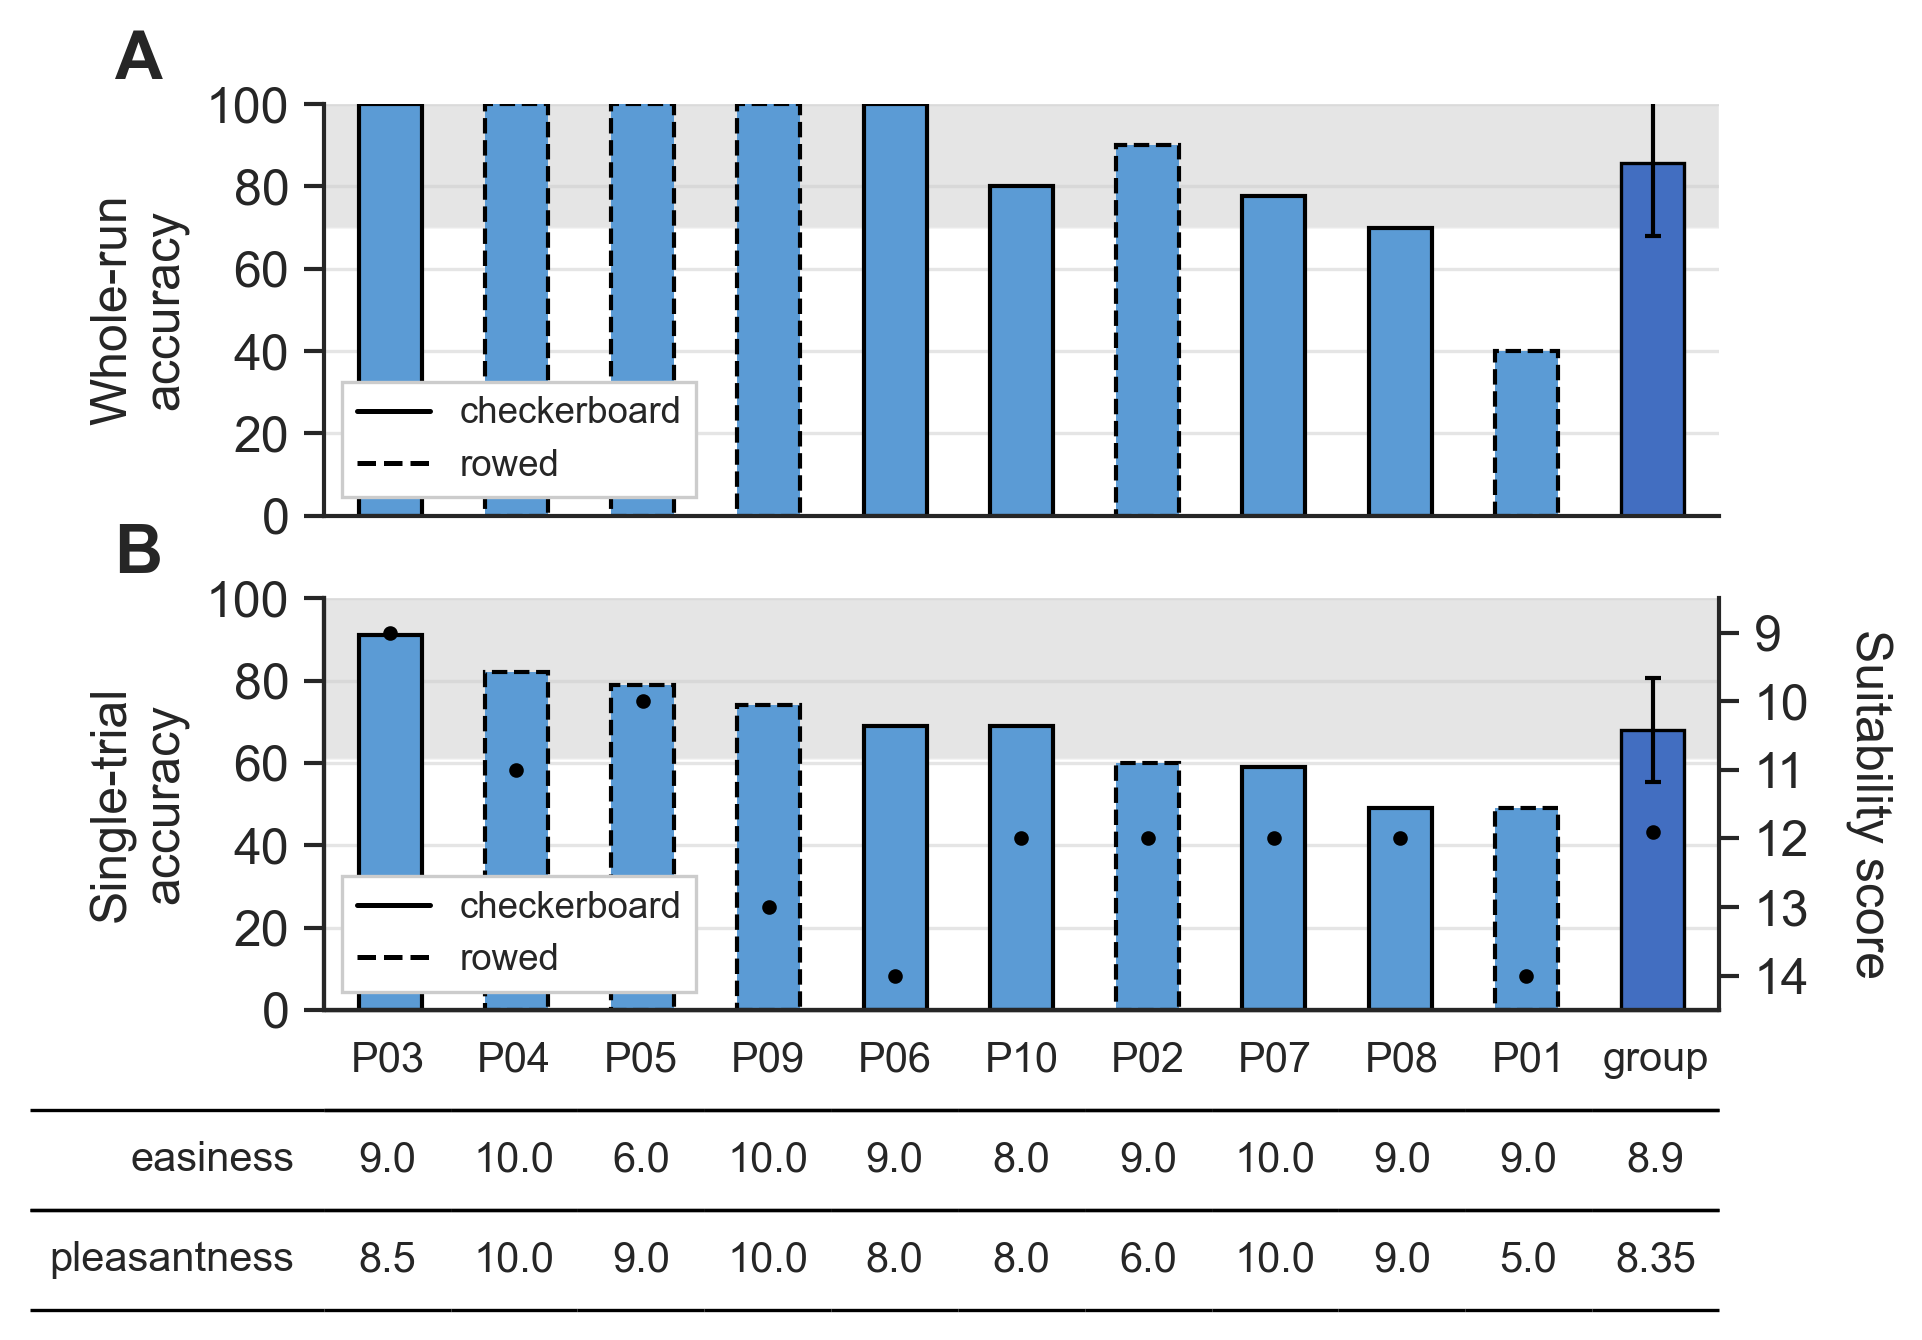

In [6]:
f,(ax1,ax2) = plt.subplots(2,1,frameon=False, dpi=dpi, figsize=figuresize)

# sort participants by ST accuracy
#data = data.sort_values('avg_wholerun_accuracy', ascending=False).sort_values('avg_st_accuracy', ascending=False)
#data = data.append(group, ignore_index=True)

# setup choices for participants are visualized when configs set to true
setup_colors = [setupa_col if "A" in data.setup_choice[el] else setupb_col for el in range(len(data.setup_choice)) ]
setup_lines = [setupa_edgeline if "A" in data.setup_choice[el] else setupb_edgeline for el in range(len(data.setup_choice)) ]

# patches for legend are created
patches = []
if setups_color:
    setupa_patch = mpatches.Patch(color=setupa_col, linestyle=setupa_edgeline, label='checkerboard')
    setupb_patch = mpatches.Patch(color=setupb_col, linestyle=setupb_edgeline, label='rowed')
    patches.append(setupa_patch)
    patches.append(setupb_patch)
if setups_border:
    setupa_line_patch = mlines.Line2D([], [], color=edgecol, marker=None,linestyle=setupa_edgeline,
                              markersize=5, label='checkerboard')
    setupb_line_patch = mlines.Line2D([], [], color=edgecol, marker=None,linestyle=setupb_edgeline,
                          markersize=5, label='rowed')    
    patches.append(setupa_line_patch)
    patches.append(setupb_line_patch)
    
if plot_ratings:
    eas_patch = mlines.Line2D([], [], color=eas_col, marker=rate_marker,linestyle=rate_line,
                              markersize=5, label='easiness')
    please_patch = mlines.Line2D([], [], color=please_col, marker=rate_marker,linestyle=rate_line,
                              markersize=5, label='pleasantness')
    patches.append(eas_patch)
    patches.append(please_patch)
if suitability_dots:
    suit_patch = mlines.Line2D([], [], color=suit_col, marker=rate_marker,linestyle=rate_line,
                          markersize=5, label='fNIRS suitability')
    patches.append(suit_patch)


########################
# plotting of bars for both figures  
whole_run_bars = data.avg_wholerun_accuracy.tolist()
st_bars = data.avg_st_accuracy.tolist()
sd_whole_acc = np.std(data.avg_wholerun_accuracy)
sd_st_acc = np.std(data.avg_st_accuracy)
for b in range(len(data.participants)):
    if data.participants[b] == "group":
        col = group_col
        ax1.bar(b, whole_run_bars[b], width=0.5, yerr=sd_whole_acc, edgecolor=edgecol, color=col, error_kw=dict(lw=1, capsize=2))
        ax2.bar(b, st_bars[b], width=0.5, yerr=sd_st_acc, edgecolor=edgecol, color=col, error_kw=dict(lw=1, capsize=2))
        if annots:
            ax1.annotate(str(np.round(whole_run_bars[b], 2)),(b+0.1,whole_run_bars[b]), horizontalalignment='left', verticalalignment="bottom")
            ax2.annotate(str(np.round(st_bars[b], 2)),(b+0.1,st_bars[b]),horizontalalignment='left', verticalalignment="bottom")
    else:
        if setups_color:
            col = setup_colors[b]
        else:
            col = setupa_col
        if setups_border:
            elinestyle=setup_lines[b]
        else:
            elinestyle=setupa_edgeline
        ax1.bar(b, whole_run_bars[b], width=0.5, edgecolor=edgecol, linestyle=elinestyle, linewidth=1, color=col, error_kw=dict(lw=1, capsize=2))
        ax2.bar(b, st_bars[b], width=0.5, edgecolor=edgecol, linestyle=elinestyle, linewidth=1, color=col, error_kw=dict(lw=1, capsize=2))
        if annots:
            ax1.annotate(str(np.round(whole_run_bars[b], 2)),(b,whole_run_bars[b]), horizontalalignment='center', verticalalignment="bottom")
            ax2.annotate(str(np.round(st_bars[b], 2)),(b,st_bars[b]),horizontalalignment='center', verticalalignment="bottom")
    

left, right = plt.xlim()  # return the current xlim
ax1.set_xlim(left=left+0.25, right=right-0.25)
ax2.set_xlim(left=left+0.25, right=right-0.25)
#ax1.axhline(y=70, color='k', linestyle=":", alpha=0.7)

# grey area indicating chi-square significance of ST accuracy; 
# at least a 61% accuracy is required for a significant deviation from chance level encoding
ax2.axhspan(61, 100, facecolor='grey', alpha=0.2 ,zorder=0)

ax1.axhspan(70, 100, facecolor='grey', alpha=0.2 ,zorder=0)


# plotting of tables below for both graphs
ad = data
for ax in f.axes:   
    ax.set_xticks([])
    ax.set_xticklabels('',linespacing=1.5)
    ax.set_ylim(0, 100)
    ax.set_yticks([0,20,40,60,80,100])
    ax.yaxis.set_tick_params(labelsize=tick_fontsize)
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_axisbelow(True)
    ax.grid(1, axis="y", alpha=0.5)
    ax.set_ylabel("Accuracy", fontsize=axis_fontsize)
    #ax.axhline(y=50, color='k', linestyle=":", alpha=0.7)

ax1.set_ylabel("Whole-run\naccuracy", fontsize=axis_fontsize)
ax2.set_ylabel("Single-trial\naccuracy", fontsize=axis_fontsize)

# add tables below graphs
cells = [ad.suitability_score, ad.easiness, ad.pleasantness]
rLabels = ['fNIRS suitability', 'easiness', 'pleasantness']

if not (setups_color or setups_border):
    cells = cells.insert(0, ad.setup_choice)
    rLabels = rLabels.insert(0, 'setup')

suitability_dots = True
if suitability_dots:
    cells.remove(ad.suitability_score) 
    rLabels.remove('fNIRS suitability')

table = ax.table(cellText=cells,
    rowLabels=rLabels,
    colLabels=ad.participants.tolist(),
    rowLoc='right',
    cellLoc='center',
    loc='bottom',
    edges="horizontal",
   # fontsize=font['size'],
     )
table.auto_set_font_size(False)
table.set_fontsize(table_fontsize)
table.scale(1,2)

# St graph: ratings and suitability are plotted if configs set to true
ax2_2 = ax2.twinx()
if plot_ratings:
    ax2_2.plot(data.rating_easiness.tolist(), marker=rate_marker,markersize=5, color=eas_col, label="easiness", linestyle=rate_line)
    ax2_2.plot(data.rating_pleasantness.tolist(), marker=rate_marker,markersize=5, color=please_col, label="pleasantness", linestyle=rate_line)
    ax2_2.spines['right'].set_visible(True)
    ax2_2.yaxis.set_visible(True)
    ax2_2.spines['top'].set_visible(False)
    ax2_2.set_ylabel("Suitability score", fontsize=axis_fontsize)
if suitability_dots:
    ax2_2.plot(data.suitability_score.tolist(), marker=rate_marker,markersize=5, color=suit_col, label="suitability score", linestyle=rate_line)
    ax2_2.set_ylim(8.5,14.5)
    ax2_2.set_yticks([i for i in range(9,15)])
    if invert_suitability_score:
        ax2_2.invert_yaxis()
    ax2_2.spines['right'].set_visible(True)
    ax2_2.yaxis.set_tick_params(labelsize=tick_fontsize)
    ax2_2.yaxis.set_visible(True)
    ax2_2.spines['top'].set_visible(False)
    ax2_2.set_ylabel("Suitability score", rotation=-90, labelpad=20, fontsize=axis_fontsize)

##################################
# legends
if len(patches) > 0:
    ax2.legend(handles=[setupa_line_patch, setupb_line_patch], loc="lower left",framealpha=1, fancybox=False)
    ax1.legend(handles=[setupa_line_patch, setupb_line_patch], loc="lower left",framealpha=1, fancybox=False)

# plot layout 
title_font = {
    "fontsize":16,
    "fontweight":"bold",
}
ax1.set_title("A", loc="left", fontdict=title_font, x=-0.15)#, pad=15)
ax2.set_title("B", loc="left", fontdict=title_font, x=-0.15)#, pad=15)
#plt.tight_layout()
#plt.subplots_adjust(left=.2)#(left=0.12, bottom=0.25)
plt.subplots_adjust(wspace=0, hspace=0.2)#(wspace=0, hspace=1.1)#(wspace=.22, hspace=.2)
plt.savefig("figure4_accuracies.svg", format="svg",bbox_inches='tight')